# Fundamentals of Artificial Intelligence Programme (2024/25 Q1)
## Data Work 2

### Introduction
<!-- A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will evaluate the impact of incorrect labels on a number of different classifiers. -->
A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will explore a dataset that has missing data (null/NaN values) and fields in formats that are uninterpretable by machine learning models. By the end, you will have spent time learning how to handle messy data and how to apply simple machine learning strategies to such data, as well as see how poorly labelled data impacts the performance of such strategies.

We have provided a number of code snippets you can use during this assignment. Feel free to modify them or replace them.


### Dataset
The dataset you will be using is the [Adult Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). Remember to download this dataset from [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/500234/viewContent/2994354/View). This dataset was created by Ronny Kohavi and Barry Becker and was used to predict whether a person's income is more/less than 50k USD based on census data.

### Data preprocessing
Start by loading and preprocessing the data. Remove NaN values, convert strings to categorical variables and encode the target variable (the string <=50K, >50K in column index 14). You can read more on categorical data in Pandas [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html), and more on encoding values [here](https://pbpython.com/categorical-encoding.html).

In [24]:
import pandas as pd
import numpy as np

In [25]:
# This can be used to load the dataset
data = pd.read_csv("adult_all.csv")
# Remove NaN values, convert strings to categorical variables and encode the target variable (the string <=50K, >50K in column index 14)
data = data.dropna()

data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,target
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
# check the values counts of all the object type columns
data.select_dtypes(include=['object']).columns

# select the columns that are non-object type and name it as data_num
data_num = data.select_dtypes(exclude=['object'])

# see the unique values in the object type columns and the number of unique values
for col in data.select_dtypes(include=['object']).columns:
    print(col)
    # print(data[col].unique())
    print(data[col].nunique())

feature1
7
feature3
16
feature5
7
feature6
14
feature7
6
feature8
5
feature9
2
feature13
41
target
2


In [27]:
# Code
# convert the object type columns to categorical type and encode them and give a dict of the encoding
data_cat = data.select_dtypes(include=['object'])
data_cat = data_cat.astype('category')
data_cat = data_cat.apply(lambda x: x.cat.codes)
data_cat.head()

# combine the numerical and encoded categorical columns
data = pd.concat([data_num, data_cat], axis=1)
data.head()

# # Check shape at end
# print(data.shape)
# print(data.info())

,feature2,feature4,feature10,feature11,feature12,feature1,feature3,feature5,feature6,feature7,feature8,feature9,feature13,target
0,77516,13,2174,0,40,5,9,4,0,1,4,1,38,0
1,83311,13,0,0,13,4,9,2,3,0,4,1,38,0
2,215646,9,0,0,40,2,11,0,5,1,4,1,38,0
3,234721,7,0,0,40,2,1,2,5,0,2,1,38,0
4,338409,13,0,0,40,2,9,2,9,5,2,0,4,0


In [28]:
# convert all the columns to int64
data = data.astype('int64')

In [31]:
# rename the columns to the original names
data.columns = ['

,feature1,feature10,feature11,feature12,feature13,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,5,2174,0,40,38,77516,9,13,4,0,1,4,1,0
1,4,0,0,13,38,83311,9,13,2,3,0,4,1,0
2,2,0,0,40,38,215646,11,9,0,5,1,4,1,0
3,2,0,0,40,38,234721,1,7,2,5,0,2,1,0
4,2,0,0,40,4,338409,9,13,2,9,5,2,0,0


In [ ]:
# 

### Data classification
Choose a [classifier](https://scikit-learn.org/stable/supervised_learning.html) and evaluate their performance in predicting the target variable. 

#### Preprocessing
Think about how you are going to encode the categorical variables, whether you want to use all of the features or not. Justify your choices 

A good method to apply preprocessing steps is using a Pipeline. Read more about this [here](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) and [here](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf). 

#### Data visualization
Calculate the correlation between different features, including the target variable. Visualize the correlations in a heatmap. A good example of how to do this can be found [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec).

Select a features you think will be an important predictor of the target variable and one which is not important. Explain your answers.

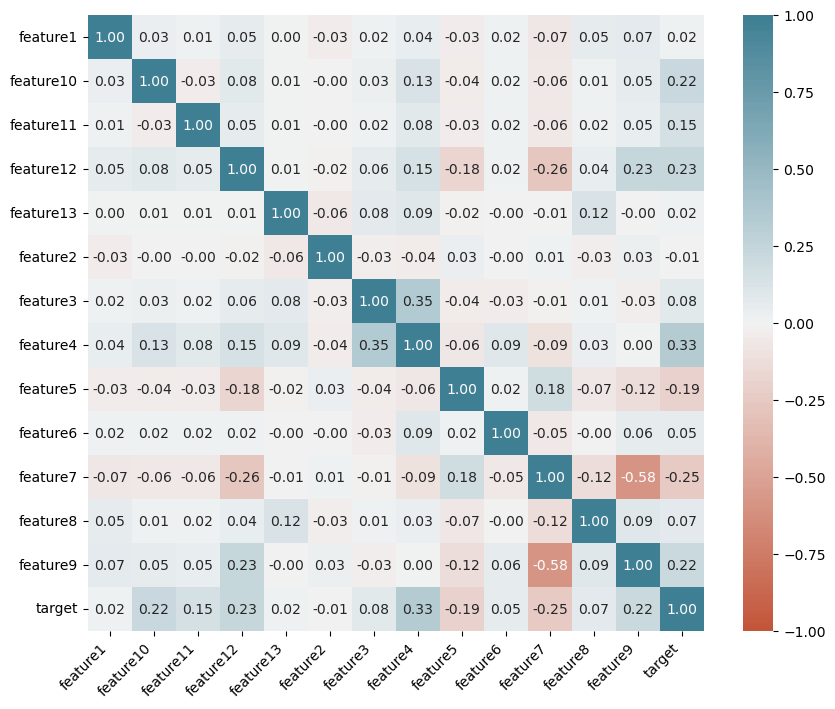

In [33]:
# Heatmap code
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True, # Add numbers on the heatmap
    fmt=".2f", # Format the numbers to 2 decimal places
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 假设你的数据集叫做 data
X = data.iloc[:, :-1]  # 前13列为特征列
y = data['target']     # 'target' 列为目标列

# 创建随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X, y)

# 获取特征重要性
importances = rf_model.feature_importances_

# 将特征名和重要性结合起来，便于展示
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 按照重要性从高到低排序
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 输出特征重要性
# import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Importance", dataframe=feature_importance)

# 打印出排序后的特征重要性
print(feature_importance)


      Feature  Importance
5    feature2    0.298972
1   feature10    0.121113
10   feature7    0.105595
3   feature12    0.090987
7    feature4    0.089359
8    feature5    0.078661
9    feature6    0.063647
2   feature11    0.040995
0    feature1    0.038067
6    feature3    0.029187
4   feature13    0.017559
11   feature8    0.014239
12   feature9    0.011619


In [40]:
X = data.iloc[:, :-1]  # 前13列为特征列
y = data[13]

KeyError: 13

In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建递归特征消除模型，选择最重要的特征
rfe = RFE(estimator=rf_model, n_features_to_select=5)  # 假设你想选出5个最重要的特征
rfe.fit(X, y)

# 输出每个特征是否被选择
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# 获取排序的特征重要性
ranking = rfe.ranking_
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking}).sort_values(by='Ranking')

# 输出递归特征消除的排序结果
# import ace_tools as tools; tools.display_dataframe_to_user(name="RFE Feature Ranking", dataframe=ranking_df)
print(ranking_df)


Selected Features: Index(['feature10', 'feature12', 'feature2', 'feature4', 'feature7'], dtype='object')
      Feature  Ranking
1   feature10        1
3   feature12        1
5    feature2        1
7    feature4        1
10   feature7        1
8    feature5        2
9    feature6        3
2   feature11        4
0    feature1        5
6    feature3        6
4   feature13        7
11   feature8        8
12   feature9        9


In [37]:
import numpy as np

# 计算特征和目标之间的相关系数
correlations = X.apply(lambda x: np.corrcoef(x, y)[0, 1])

# 输出特征和目标的相关系数
correlation_df = pd.DataFrame({'Feature': X.columns, 'Correlation': correlations})
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Correlation", dataframe=correlation_df)
print(correlation_df)


             Feature  Correlation
feature4    feature4     0.332800
feature12  feature12     0.227199
feature10  feature10     0.221034
feature9    feature9     0.215760
feature11  feature11     0.148687
feature3    feature3     0.081196
feature8    feature8     0.070844
feature6    feature6     0.049787
feature13  feature13     0.020103
feature1    feature1     0.015659
feature2    feature2    -0.007264
feature5    feature5    -0.192711
feature7    feature7    -0.253402


In [12]:
# check the values counts of all the object type columns
data.select_dtypes(include=['object']).columns

# select the columns that are non-object type and name it as data_num
data_num = data.select_dtypes(exclude=['object'])

# see the unique values in the object type columns and the number of unique values
for col in data.select_dtypes(include=['object']).columns:
    print(col)
    # print(data[col].unique())
    print(data[col].nunique())

feature1
8
feature3
16
feature5
7
feature6
14
feature7
6
feature8
5
feature9
2
feature13
41
target
2


#### Evaluation
Use a metric from the lecture videos to evaluate the performance of the model.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your preprocessing steps here
steps = []

# Combine steps into a ColumnTransformer
ct = ColumnTransformer(steps)

# show the correlation between different features including target variable
def visualize(data, ct):
    pass

# Apply your model to feature array X and labels y
def apply_model(model, X, y):    
    # Wrap the model and steps into a Pipeline
    pipeline = Pipeline(steps=[('t', ct), ('m', model)])
    
    # Evaluate the model and store results
    return evaluate_model(X, y, pipeline)

# Apply your validation techniques and calculate metrics
def evaluate_model(X, y, pipeline):
    pass

In [0]:
# Your code


### Label perturbation
To evaluate the impact of faulty labels in a dataset, we will introduce some errors in the labels of our data.


#### Preparation
Start by creating a method which alters a dataset by selecting a percentage of rows randomly and swaps labels from a 0->1 and 1->0. 


In [0]:
import random

"""Given a label vector, create a new copy where a random fraction of the labels have been flipped."""
def pertubate(y: np.ndarray, fraction: float) -> np.ndarray:
    copy = data.copy()
    # Flip fraction*len(data) of the labels in copy
    return copy

#### Analysis
Create a number of new datasets with perturbed labels, for fractions ranging from `0` to `0.5` in increments of `0.1`.

Perform the same experiment you did before, which compared the performances of different models except with the new datasets. Repeat your experiment at least once for each model and perturbation level and calculate the mean and variance of the scores.

In [0]:
# Your code

Authors: Youri Arkesteijn, Tim van der Horst and Kevin Chong.

### Final Thoughts

You may have noticed in your exploration that there are many different classification models. While it's not required we highly recommend repeating the exercises above with different classifiers and exploring the sklearn documentation to familiarize yourself with the many tools available.